In [1]:
%matplotlib inline

# CNOT eigen-decoposition

In [2]:
import numpy as np

# 定义CNOT门矩阵
CNOT = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]])

# 计算CNOT门的本征值和本征向量
eigenvalues, eigenvectors = np.linalg.eig(CNOT)

# 输出本征值和本征向量
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

# 计算P和D矩阵
P = eigenvectors
D = np.diag(eigenvalues)
P_inv = np.linalg.inv(P)


# 输出P和D矩阵
print("P matrix:\n", P)
print("D matrix:\n", D)
print("P_inv matrix:\n", P_inv)

Eigenvalues:
 [ 1. -1.  1.  1.]
Eigenvectors:
 [[ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]
 [ 0.70710678 -0.70710678  0.          0.        ]
 [ 0.70710678  0.70710678  0.          0.        ]]
P matrix:
 [[ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]
 [ 0.70710678 -0.70710678  0.          0.        ]
 [ 0.70710678  0.70710678  0.          0.        ]]
D matrix:
 [[ 1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
P_inv matrix:
 [[ 0.          0.          0.70710678  0.70710678]
 [ 0.          0.         -0.70710678  0.70710678]
 [ 1.          0.          0.          0.        ]
 [ 0.          1.          0.          0.        ]]


# Circuit Form U(θ)

In [3]:
import sympy as sp

# 定义符号变量
theta = sp.Symbol('theta', real=True)

# 定义矩阵D
D = sp.diag(1, sp.exp(sp.I*sp.pi*sp.cos(theta)**2), 1, 1)

U = P * D * P_inv

U

Matrix([
[1.0,   0,                                 0,                                 0],
[  0, 1.0,                                 0,                                 0],
[  0,   0, 0.5*exp(I*pi*cos(theta)**2) + 0.5, 0.5 - 0.5*exp(I*pi*cos(theta)**2)],
[  0,   0, 0.5 - 0.5*exp(I*pi*cos(theta)**2), 0.5*exp(I*pi*cos(theta)**2) + 0.5]])

As the Z msmt result of input 00 and 11 are related to the front two columns of the matrix, we could easily found outputs of them are 1 and -1, respectively. Both of them are independent of θ.

In [4]:
from sympy import sqrt, symbols, pi, cos, Matrix, latex, trace
from IPython.display import display, Math

sp.eye(2)

Matrix([
[1, 0],
[0, 1]])

# O_tilde

In [5]:
from sympy import tensorproduct

II = np.eye(2)
Z = np.array([[1, 0], [0, -1]])
Ob = np.kron(II, Z)

print("Observable matrix:")
print(Ob)

# 计算U(a)^\dagger O U(a)
U_dagger = U.H
O_tilde = U_dagger @ Ob @ U
O_tilde.simplify()

print("U:")
display(Math(latex(U)))
print("U(a)^\dagger:")
display(Math(latex(U_dagger)))
# print("U(a)^\dagger @ Ob:")
# display(Math(latex(U_dagger@Ob)))
print("O_tilde:")
display(Math(latex(O_tilde)))

Observable matrix:
[[ 1.  0.  0.  0.]
 [ 0. -1.  0. -0.]
 [ 0.  0.  1.  0.]
 [ 0. -0.  0. -1.]]
U:


<IPython.core.display.Math object>

U(a)^\dagger:


<IPython.core.display.Math object>

O_tilde:


<IPython.core.display.Math object>

# PO and SG

In [6]:
SWAP = Matrix([[1, 0, 0, 0],
               [0, 0, 1, 0],
               [0, 1, 0, 0],
               [0, 0, 0, 1]])

S_dagger = SWAP.T  # SWAP 门是自它的转置的逆，因此 S^† = S^T
PO1 = S_dagger @ O_tilde @ SWAP
PO1.simplify()
print("PO1 matrix:")
display(Math(latex(PO1)))

II = Matrix([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1, 0],
               [0, 0, 0, 1]])
PO2 = II @ O_tilde @ II
PO2.simplify()
print("PO2 matrix:")
display(Math(latex(PO2)))

PO = 1/2 * (PO1 + PO2)

print("PO matrix:")
display(Math(latex(PO)))

# 计算 PO 和 O_tilde 之间的差
diff_matrix = PO - O_tilde

# 计算 H-S norm
# HS_norm = sqrt(sum([abs(elem)**2 for elem in diff_matrix]))
# HS_norm = sqrt(trace(diff_matrix.H * diff_matrix))
HS_norm = trace(diff_matrix.H * diff_matrix)

# 简化表达式
HS_norm = HS_norm.simplify()

print("HS_norm:")
display(Math(latex(HS_norm)))

PO1 matrix:


<IPython.core.display.Math object>

PO2 matrix:


<IPython.core.display.Math object>

PO matrix:


<IPython.core.display.Math object>

HS_norm:


<IPython.core.display.Math object>

# SG Plot

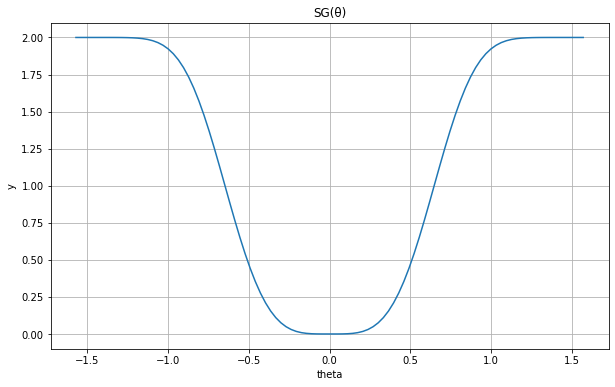

In [7]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
# from IPython.display import display

y = sp.lambdify(theta, HS_norm, 'numpy')
theta = np.linspace(-np.pi/2, np.pi/2, 100)  # 在区间 [-2, 2] 内创建 1000 个等间距的点
y = y(theta)

fig = plt.figure(figsize=(10, 6))  # 设置图像大小
plt.plot(theta, y)  # 绘制函数图像
plt.xlabel('theta')  # 设置 x 轴标签
plt.ylabel('y')  # 设置 y 轴标签
plt.title('SG(θ)')  # 设置标题
plt.grid()  # 显示网格线

# display(fig)  # 显示图像
# plt.close(fig)  # 关闭图像，防止重复显示